In [1]:
import numpy as np
from torch import dtype

from imports.models import *
from imports.utils import *
import time
import matplotlib.pyplot as plt

In [2]:
exp_data = np.load('./data/exp_data/exp_data_32.npy')
time_data = np.load('./data/time_data/time_data_32.npy')

In [3]:
denoising_model = Denoise_Model()
denoising_model.load_state_dict(torch.load('./data/models/denoising_model.pt'))
denoising_model.eval()

<All keys matched successfully>

In [11]:
exp_data_stacked = np.stack([exp_data, exp_data], axis=0)
input_tensor = torch.tensor(exp_data_stacked.reshape(1, 2, -1), dtype=torch.float32)

In [15]:
with torch.no_grad():
    denoised_output = denoising_model(input_tensor)

# 결과 numpy로 변환
exp_data_deno = denoised_output.cpu().numpy().squeeze()

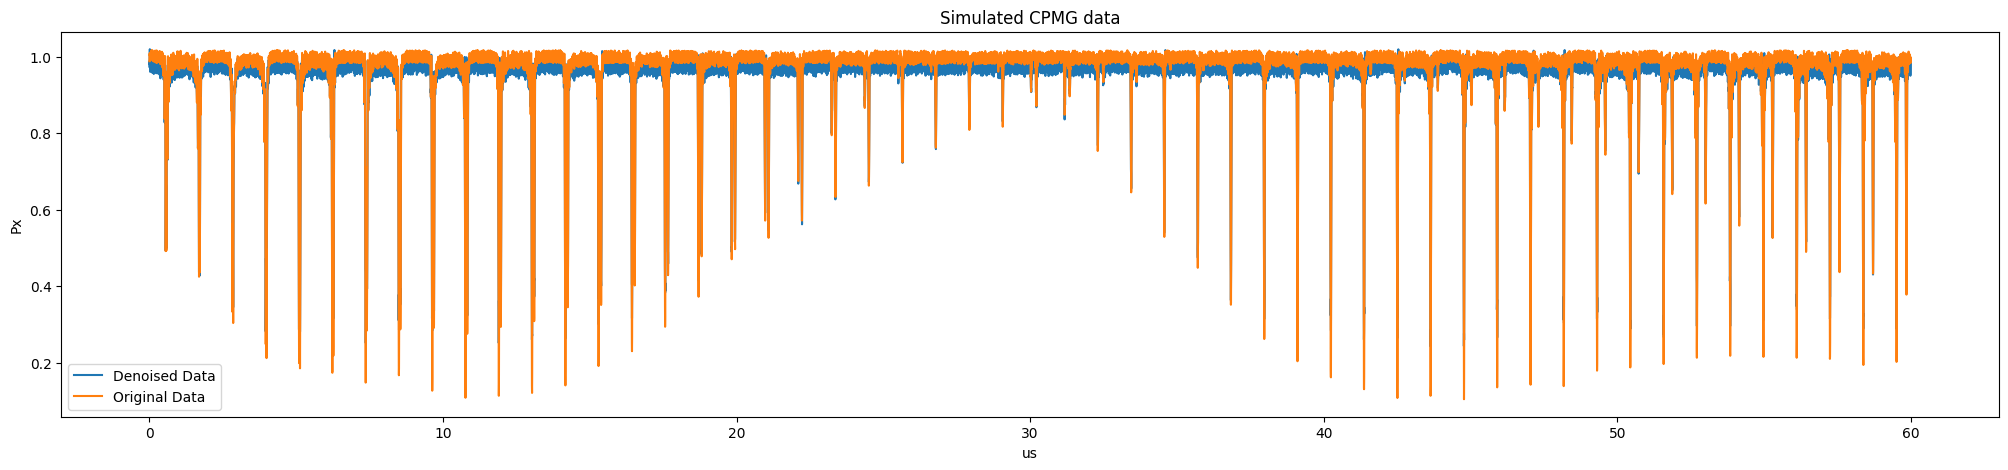

In [17]:
plt.figure(facecolor='w', figsize=(25, 5))
plt.plot(time_data, exp_data_deno[0], label='Denoised Data')  # 첫 번째 그래프
plt.plot(time_data, exp_data, label='Original Data')  # 두 번째 그래프

plt.title('Simulated CPMG data')
plt.xlabel('us')
plt.ylabel('Px')
plt.legend()
plt.show()

In [ ]:
np.save('./data/exp_data/exp_data_32_deno.npy', exp_data_deno)